# Import of the dataset and necessary packages.

In [ ]:
#pip install missingno
# if you get an error in imports, uncomment this cell to run the necessary pip install

In [ ]:
#pip install category_encoders
# if you get an error in imports, uncomment this cell to run the necessary pip install

In [ ]:
# Run this cell first to mount your entire google drive.
# we will use this format for now while working on the project. Upon submission we will submit all the files including the dataset.
# TODO: Change the read with pandas before submission.
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Run this cell next to read the dataset.
# File_id is the id of dataset.
# Package Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
file_id = "1crnj1FKEEaVlF_htFqSCLEma2HjIFhwg"
url = 'https://drive.google.com/uc?id={}'.format(file_id)
df = pd.read_csv(url)

In [ ]:
# Double check that the loading of the files worked by running this cell.
df.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


# **Data preprocessing**



## *Drop Unnecessary Columns*

In [ ]:
df.drop(['region', 'state_code', 'permalink', 'homepage_url', 'name'], axis=1, inplace=True)

df.head(10)

,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Media,10000000,operating,IND,Mumbai,1,NaN,2015-01-05,2015-01-05
1,Application Platforms|Real Time|Social Network...,700000,operating,USA,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,Apps|Games|Mobile,3406878,operating,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,Curated Web,2000000,operating,CHN,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,Software,-,operating,USA,Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,Games,41250,operating,HKG,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,Biotechnology,762851,operating,CAN,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,Analytics,33600000,operating,USA,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,Mobile,1150050,operating,USA,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,E-Commerce,40000,operating,CHL,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


## *Here we will check and rectify the values in the remaining columns that contain aberrant values or are of the wrong datatype.*
If any of the rows contain values that are abberant, (I.E, dates like 1532-06-26) we will replace them with a null value to be removed from the dataset.
We will also check whether the datatypes for the columns are correct, and make the necessary changes.

In [ ]:
# First we check what are the datatypes of the remaining columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category_list      63220 non-null  object
 1   funding_total_usd  66368 non-null  object
 2   status             66368 non-null  object
 3   country_code       59410 non-null  object
 4   city               58340 non-null  object
 5   funding_rounds     66368 non-null  int64 
 6   founded_at         51147 non-null  object
 7   first_funding_at   66344 non-null  object
 8   last_funding_at    66368 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


Then we rectify the column datatypes.

## *Convert `founded_at`, `first_funding_at`, `last_funding_at` to datetime*
We will also restrict the range of values that are to be included in the final dataset to be within the ranges of '1980-01-01' to '2023-01-01'


In [ ]:
# Convert the columns to datetime with errors='coerce'
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

# Set a legitimate range of dates. If there are rows with dates that fall outside of these ranges, we will replace them with NaT to be removed later.
min_date = pd.Timestamp('1980-01-01')
max_date = pd.Timestamp('2023-01-01')

# List of columns to be filtered
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']

# Use a for loop to filter dates outside of the range for each column
for col in date_columns:
    df.loc[(df[col] < min_date) | (df[col] > max_date), col] = pd.NaT

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category_list      63220 non-null  object        
 1   funding_total_usd  66368 non-null  object        
 2   status             66368 non-null  object        
 3   country_code       59410 non-null  object        
 4   city               58340 non-null  object        
 5   funding_rounds     66368 non-null  int64         
 6   founded_at         50519 non-null  datetime64[ns]
 7   first_funding_at   66336 non-null  datetime64[ns]
 8   last_funding_at    66362 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 4.6+ MB
None


## *Convert funding_total_usd to float*

In [ ]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category_list      63220 non-null  object        
 1   funding_total_usd  53583 non-null  float64       
 2   status             66368 non-null  object        
 3   country_code       59410 non-null  object        
 4   city               58340 non-null  object        
 5   funding_rounds     66368 non-null  int64         
 6   founded_at         50519 non-null  datetime64[ns]
 7   first_funding_at   66336 non-null  datetime64[ns]
 8   last_funding_at    66362 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 4.6+ MB


## *Handling values that are missing*

We have noticed that there are some rows with '-'. We will replace these values with an np.nan object.

In [ ]:
# Replace data that have '-' with np.nan
for col in df.columns:
    df[col] = df[col].replace('-',np.nan)

Here we will keep track of the data that will be removed to ensure that the remaining data left after the removal of rows that have null values is still a valid representation of the original data.

We would remove 35.62% of the ipo observations before
We would remove 34.17% of the acquired observations before
We would remove 57.84% of the closed observations before
We would remove 41.91% of the operating observations before


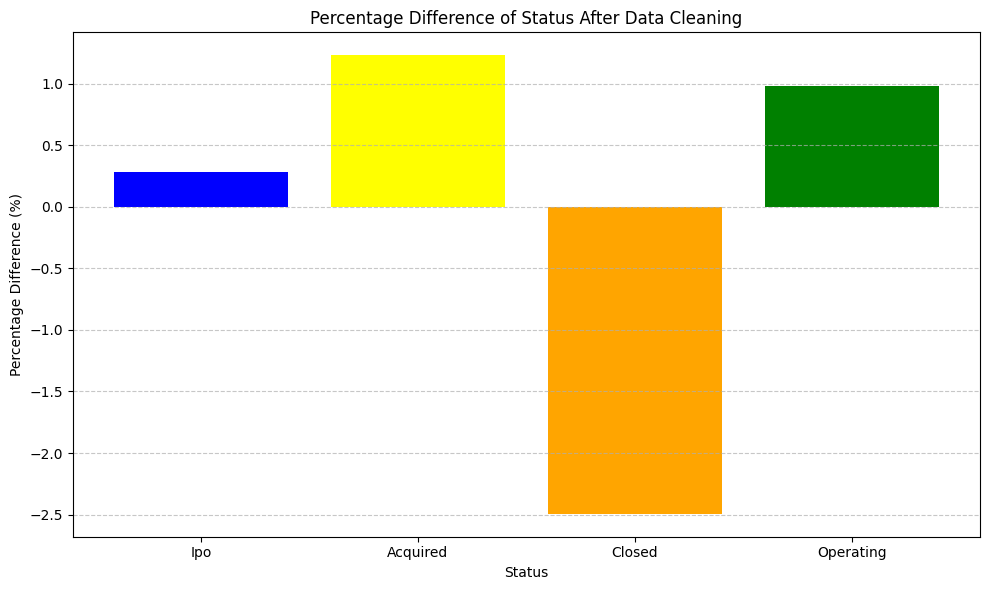

In [ ]:
# List of unique statuses
statuses = ['ipo', 'acquired', 'closed', 'operating']

# Initialize dictionaries to store counts, percentages before and after cleaning, and the lost percentages
counts_before = {}
counts_after = {}
percentages_before = {}
percentages_after = {}
percentage_lost = {}

# Remove rows with null values
df_cleaned = df.dropna(axis=0, how='any')

# Calculate counts, percentages, and lost percentages for each status
for status in statuses:
    counts_before[status] = df[df['status'] == status].shape[0]
    counts_after[status] = df_cleaned[df_cleaned['status'] == status].shape[0]
    percentages_before[status] = counts_before[status] / df.shape[0]
    percentages_after[status] = counts_after[status] / df_cleaned.shape[0]
    percentage_lost[status] = (counts_before[status] - counts_after[status]) / counts_before[status]

# Calculate the percentage differences
percentage_differences = [(percentages_after[status] - percentages_before[status]) * 100 for status in statuses]

# Print the percentage of observations removed for each status
for status in statuses:
    print(f"We would remove {percentage_lost[status] * 100:.2f}% of the {status} observations before")

# Plot the percentage differences
plt.figure(figsize=(10, 6))
plt.bar([status.capitalize() for status in statuses], percentage_differences, color=['blue', 'yellow', 'orange', 'green'])
plt.title('Percentage Difference of Status After Data Cleaning')
plt.xlabel('Status')
plt.ylabel('Percentage Difference (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can observe that
*   We would remove 35.62% of the <u>**ipo observations**</u> before
*   We would remove 34.17% of the <u>**acquired observations**</u> before
*   We would remove 57.84% of the <u>**closed observations**</u> before
*   We would remove 41.91% of the <u>**operating observations**</u> before


We also observe the difference in percentage of each status over the <u>**total number of observations**</u> before and after is plotted.

We can see that after the removal of data:
*   The 'IPO' category saw less than 0.5% increase in its percentage.
*   The 'Acquired' category saw slightly more than a 1% increase in its percentage.
*   The 'Closed' category saw 2.5% decrease in its percentage.
*   The 'Operating' category saw a 1% increase in its percentage.

Since the percentages of each status over the total observations before after did not vary by much, (less than 3%) it is acceptable to continue forward with the cleaned dataset.



## *Transform `category_list` variable into `main_category`*




In [ ]:
df_cleaned['main_category'] = df_cleaned['category_list'].str.split('|').str[0]
df_cleaned.drop(columns=['category_list'], axis=1, inplace=True)

df_cleaned.head()

<ipython-input-13-fc2102f146e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['main_category'] = df_cleaned['category_list'].str.split('|').str[0]
<ipython-input-13-fc2102f146e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['category_list'], axis=1, inplace=True)


,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at,main_category
1,700000.0,operating,USA,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms
3,2000000.0,operating,CHN,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web
6,762851.0,operating,CAN,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,Biotechnology
7,33600000.0,operating,USA,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,Analytics
8,1150050.0,operating,USA,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,Mobile


## *Apply label encoding to `main_category`*

In [ ]:
label_encoder = LabelEncoder()

df_cleaned['main_category'] = label_encoder.fit_transform(df_cleaned['main_category'])

df_cleaned.head()

<ipython-input-14-c6bfd19655cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['main_category'] = label_encoder.fit_transform(df_cleaned['main_category'])


,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at,main_category
1,700000.0,operating,USA,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,31
3,2000000.0,operating,CHN,Beijing,1,2007-01-01,2008-03-19,2008-03-19,170
6,762851.0,operating,CAN,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,67
7,33600000.0,operating,USA,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,22
8,1150050.0,operating,USA,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,444


## *Apply label encoding to `city`*

In [ ]:
label_encoder = LabelEncoder()

df_cleaned['city'] = label_encoder.fit_transform(df_cleaned['city'])

df_cleaned.head()

<ipython-input-15-55e70fb3bcde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['city'] = label_encoder.fit_transform(df_cleaned['city'])


,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at,main_category
1,700000.0,operating,USA,791,2,2014-09-04,2014-03-01,2014-10-14,31
3,2000000.0,operating,CHN,223,1,2007-01-01,2008-03-19,2008-03-19,170
6,762851.0,operating,CAN,3254,2,1997-01-01,2009-09-11,2009-12-21,67
7,33600000.0,operating,USA,2059,4,2011-01-01,2013-01-03,2015-11-09,22
8,1150050.0,operating,USA,2738,3,2011-08-01,2011-07-20,2014-02-05,444


## *Apply label encoding to the `country_code` variable*

In [ ]:
label_encoder = LabelEncoder()

df_cleaned['country_code'] = label_encoder.fit_transform(df_cleaned['country_code'])

df_cleaned.head()

<ipython-input-16-1892f71810b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['country_code'] = label_encoder.fit_transform(df_cleaned['country_code'])


,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at,main_category
1,700000.0,operating,114,791,2,2014-09-04,2014-03-01,2014-10-14,31
3,2000000.0,operating,20,223,1,2007-01-01,2008-03-19,2008-03-19,170
6,762851.0,operating,17,3254,2,1997-01-01,2009-09-11,2009-12-21,67
7,33600000.0,operating,114,2059,4,2011-01-01,2013-01-03,2015-11-09,22
8,1150050.0,operating,114,2738,3,2011-08-01,2011-07-20,2014-02-05,444


# **Feature Engineering**
We are introducing two new variables:
- funding_duration = Time (in days) between first funding round and last funding round
- time_to_first_funding = Time (in days) between founding and first funding round

We will then drop those rows to preven data leakage.

In [ ]:
# Getting the derived metrics from the raw dates.
df_cleaned['time_to_first_funding'] = (df_cleaned['first_funding_at'] - df_cleaned['founded_at']).dt.days
df_cleaned['funding_duration'] = (df_cleaned['last_funding_at'] - df_cleaned['first_funding_at']).dt.days

# Dropping the columns with the raw dates
df_cleaned.drop(columns=['founded_at','first_funding_at','last_funding_at'], axis=1, inplace=True)
df_cleaned.head()

<ipython-input-17-ae7ca323fa7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_to_first_funding'] = (df_cleaned['first_funding_at'] - df_cleaned['founded_at']).dt.days
<ipython-input-17-ae7ca323fa7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['funding_duration'] = (df_cleaned['last_funding_at'] - df_cleaned['first_funding_at']).dt.days
<ipython-input-17-ae7ca323fa7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

,funding_total_usd,status,country_code,city,funding_rounds,main_category,time_to_first_funding,funding_duration
1,700000.0,operating,114,791,2,31,-187,227
3,2000000.0,operating,20,223,1,170,443,0
6,762851.0,operating,17,3254,2,67,4636,101
7,33600000.0,operating,114,2059,4,22,733,1040
8,1150050.0,operating,114,2738,3,444,-12,931


## *Changing the target variables to group all 'success' cases as having a value of '1', and failure cases as having a value of '0'.*

Here, we classify success cases as having either been 'acquired' or 'ipo' every other case will be classified as a failure.

In [ ]:
# Change ipo and accquired to 1, everything else to 0
df_cleaned['is_successful'] = df_cleaned['status'].apply(lambda x: 1 if x in ['acquired', 'ipo'] else 0)

# Remove labels
X = df_cleaned.drop(['status', 'is_successful'], axis=1)
y = df_cleaned['is_successful']

<ipython-input-18-0ed72c811d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_successful'] = df_cleaned['status'].apply(lambda x: 1 if x in ['acquired', 'ipo'] else 0)


In [ ]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

funding_total_usd        0
status                   0
country_code             0
city                     0
funding_rounds           0
main_category            0
time_to_first_funding    0
funding_duration         0
is_successful            0
dtype: int64


# **KNN**


### Model 1

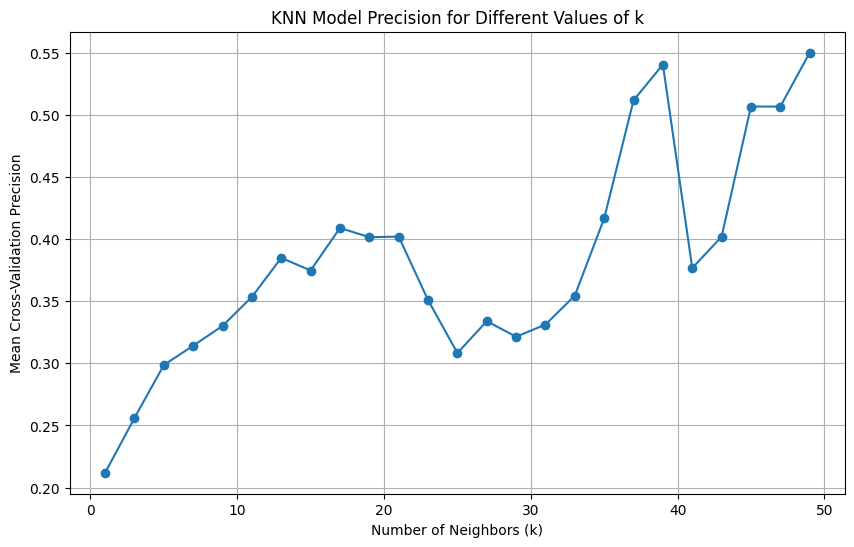

(49, 0.55)

In [ ]:
# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=123123)

# Create a pipeline for the KNN model
# This pipeline first scales the data using StandardScaler and then applies KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features to have mean=0 and variance=1
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define a grid of hyperparameters for KNN
# In this case, we're tuning the number of neighbors (k)
param_grid = {
    'knn__n_neighbors': list(range(1, 51, 2))  # Testing odd values of k from 1 to 49
}

# Use Stratified K-Folds cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to perform cross-validation for each value of k
# This will automatically find the best value of k that gives the highest accuracy
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=stratified_kfold, scoring='precision', n_jobs=-1)
grid_search.fit(X_train_knn, y_train_knn)

# Extract the best value of k and its corresponding accuracy score
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

# Extract the mean cross-validation scores for each k value from the grid search results
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], mean_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Precision')
plt.title('KNN Model Precision for Different Values of k')
plt.grid(True)
plt.show()

(best_k, best_score)

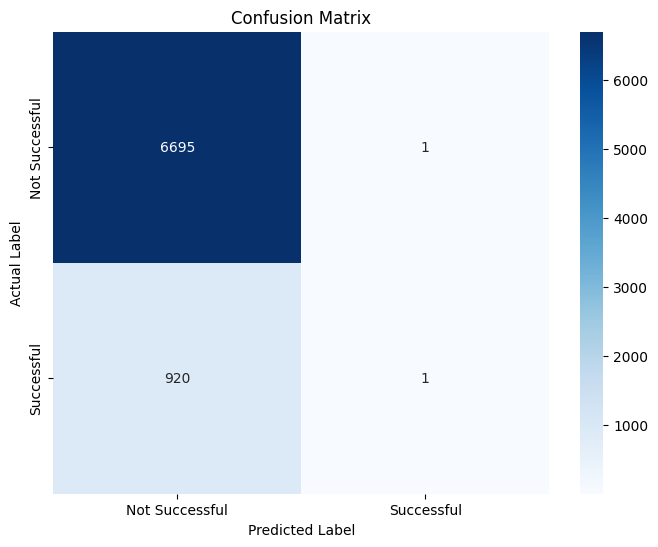

In [ ]:
knn_pipeline.set_params(knn__n_neighbors=best_k)
knn_pipeline.fit(X_train_knn, y_train_knn)

# Predict on the test set
y_pred_knn = knn_pipeline.predict(X_test_knn)

# Generate the confusion matrix for the best k
conf_matrix_best_k = confusion_matrix(y_test_knn, y_pred_knn)

conf_matrix_best_k, best_k, best_score

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_k, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

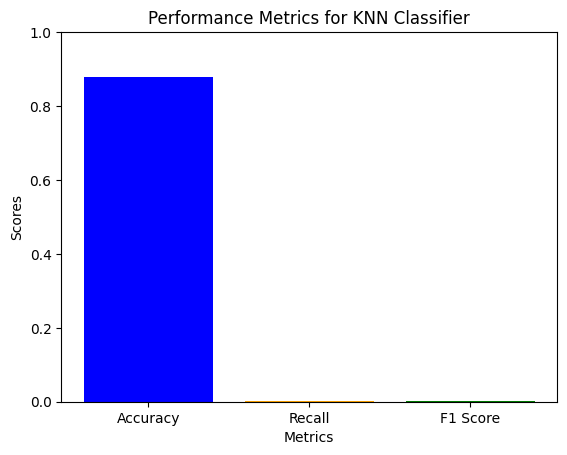

(0.8790862544308783, 0.0010857763300760044, 0.0021668472372697724)

In [ ]:
# Metrics calculation
accuracy = accuracy_score(y_test_knn, y_pred_knn)
recall = recall_score(y_test_knn, y_pred_knn, pos_label=1)
f1 = f1_score(y_test_knn, y_pred_knn, pos_label=1)

# Metrics for plotting
metrics = {'Accuracy': accuracy, 'Recall': recall, 'F1 Score': f1}

# Plotting
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics for KNN Classifier')
plt.ylim([0, 1])  # Assuming scores are between 0 and 1
plt.show()

accuracy, recall, f1

# Model 2

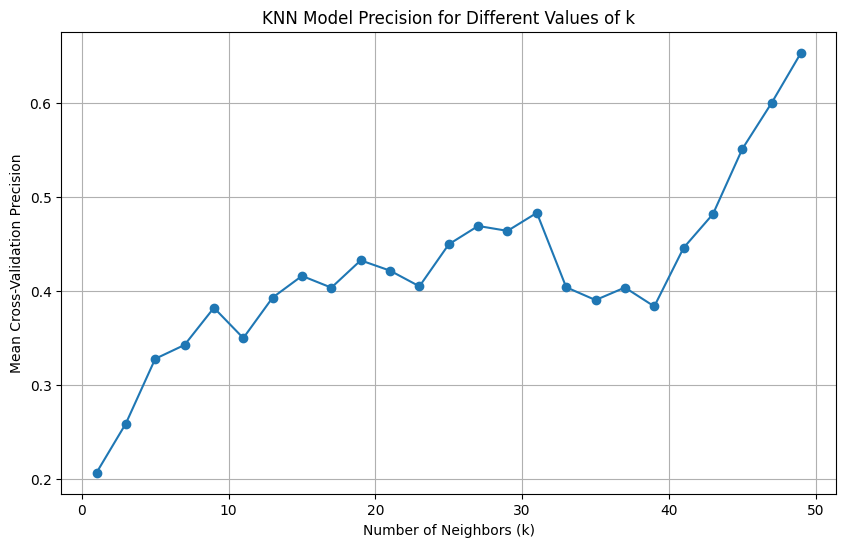

(49, 0.6533333333333333)

In [ ]:
# Prepare the data for KNN model
# Jeremy removed datetime drop to earlier

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=123123, stratify=y)

# Create a pipeline for the KNN model
# This pipeline first scales the data using StandardScaler and then applies KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features to have mean=0 and variance=1
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define a grid of hyperparameters for KNN
# In this case, we're tuning the number of neighbors (k)
param_grid = {
    'knn__n_neighbors': list(range(1, 51, 2))  # Testing odd values of k from 1 to 49
}

# Use Stratified K-Folds cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to perform cross-validation for each value of k
# This will automatically find the best value of k that gives the highest accuracy
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=stratified_kfold, scoring='precision', n_jobs=-1)
grid_search.fit(X_train_knn, y_train_knn)

# Extract the best value of k and its corresponding accuracy score
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

# Extract the mean cross-validation scores for each k value from the grid search results
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], mean_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Precision')
plt.title('KNN Model Precision for Different Values of k')
plt.grid(True)
plt.show()

(best_k, best_score)

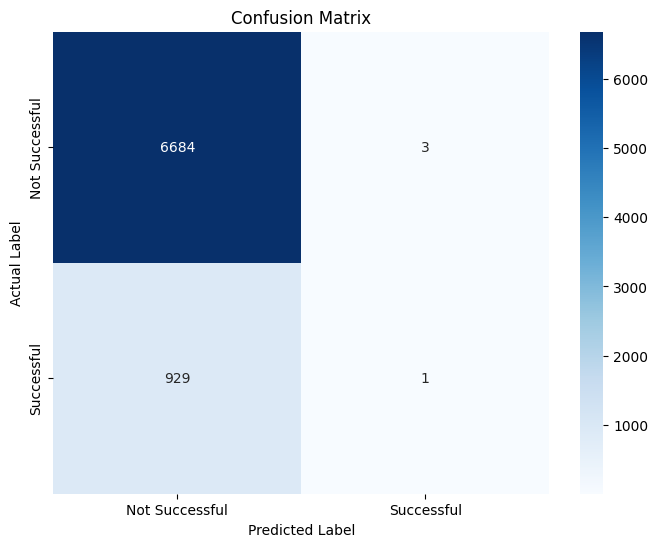

In [ ]:
knn_pipeline.set_params(knn__n_neighbors=best_k)
knn_pipeline.fit(X_train_knn, y_train_knn)

# Predict on the test set
y_pred_knn = knn_pipeline.predict(X_test_knn)

# Generate the confusion matrix for the best k
conf_matrix_best_k = confusion_matrix(y_test_knn, y_pred_knn)

conf_matrix_best_k, best_k, best_score

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_k, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

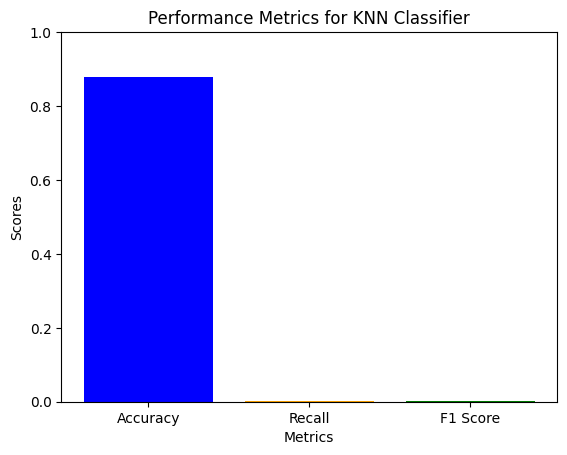

(0.8776421163187607, 0.001075268817204301, 0.002141327623126338)

In [ ]:
# Metrics calculation
accuracy = accuracy_score(y_test_knn, y_pred_knn)
recall = recall_score(y_test_knn, y_pred_knn, pos_label=1)
f1 = f1_score(y_test_knn, y_pred_knn, pos_label=1)

# Metrics for plotting
metrics = {'Accuracy': accuracy, 'Recall': recall, 'F1 Score': f1}

# Plotting
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics for KNN Classifier')
plt.ylim([0, 1])  # Assuming scores are between 0 and 1
plt.show()

accuracy, recall, f1

# Model 3
## Undersampling

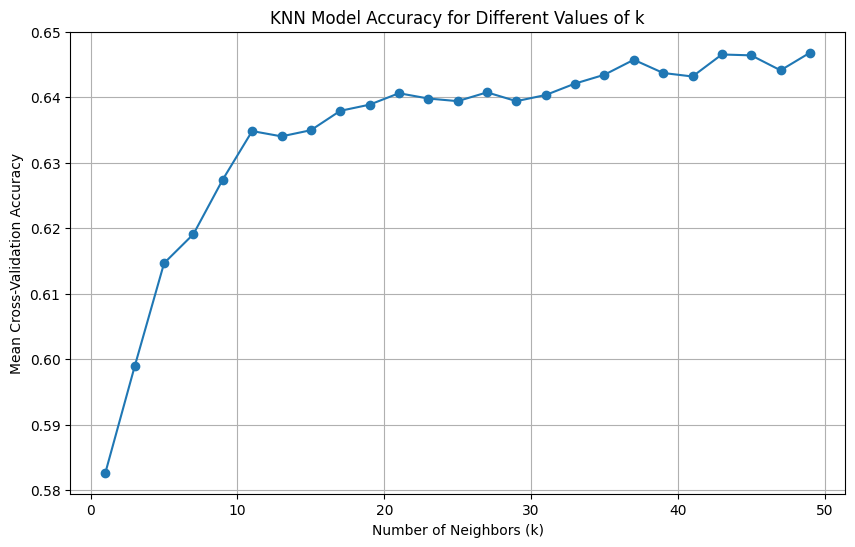

(49, 0.6468143263119075)

In [ ]:
# Separate the majority and minority classes
df_majority = df_cleaned[df_cleaned['is_successful'] == 0]
df_minority = df_cleaned[df_cleaned['is_successful'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,            # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42)          # reproducible results

# Combine the minority class with the downsampled majority class
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

# Check the class distribution in the undersampled data
undersampled_class_distribution = df_undersampled['is_successful'].value_counts()
undersampled_class_distribution


# Extract the features and target from the undersampled data
X_knn = df_undersampled.drop(['status', 'is_successful'], axis=1)
y_knn = df_undersampled['is_successful']

# Split the undersampled data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=123123, stratify=y_knn)

# Define a pipeline for the KNN classifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features to have mean=0 and variance=1
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define a range of k values to test with the KNN classifier
param_grid = {
    'knn__n_neighbors': list(range(1, 51, 2))  # Testing odd values of k from 1 to 49
}

# Use Stratified K-Folds cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to perform cross-validation for each k value in the specified range
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_knn, y_train_knn)

# Extract the best k value and its corresponding accuracy score from the grid search results
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

# Extract the mean cross-validation scores for each k value from the grid search results
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], mean_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('KNN Model Accuracy for Different Values of k')
plt.grid(True)
plt.show()

(best_k, best_score)

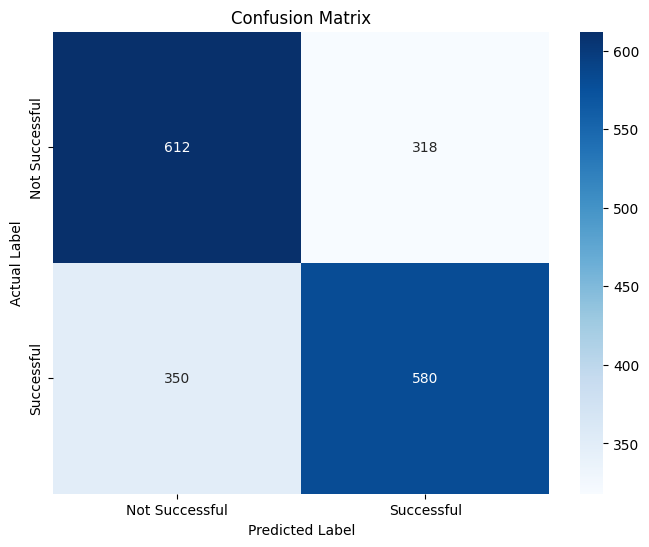

In [ ]:
knn_pipeline.set_params(knn__n_neighbors=best_k)
knn_pipeline.fit(X_train_knn, y_train_knn)

# Predict on the test set
y_pred_knn = knn_pipeline.predict(X_test_knn)

# Generate the confusion matrix for the best k
conf_matrix_best_k = confusion_matrix(y_test_knn, y_pred_knn)

conf_matrix_best_k, best_k, best_score

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_k, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

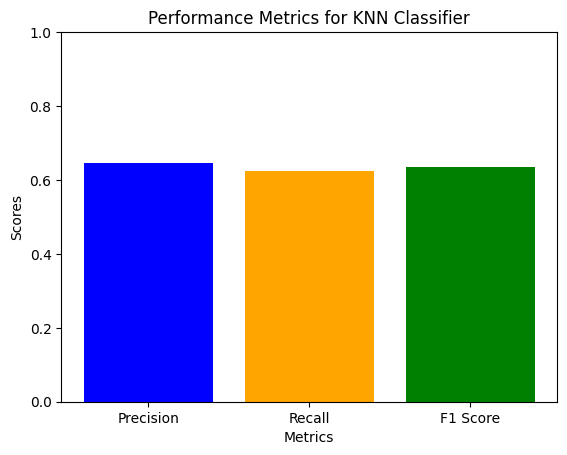

(0.6458797327394209, 0.6236559139784946, 0.6345733041575492)

In [ ]:
# Metrics calculation
precision = precision_score(y_test_knn, y_pred_knn)
recall = recall_score(y_test_knn, y_pred_knn, pos_label=1)
f1 = f1_score(y_test_knn, y_pred_knn, pos_label=1)

# Metrics for plotting
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Plotting
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics for KNN Classifier')
plt.ylim([0, 1])  # Assuming scores are between 0 and 1
plt.show()

precision, recall, f1

# Model 4
# Oversampling

0    33436
1    33436
Name: is_successful, dtype: int64


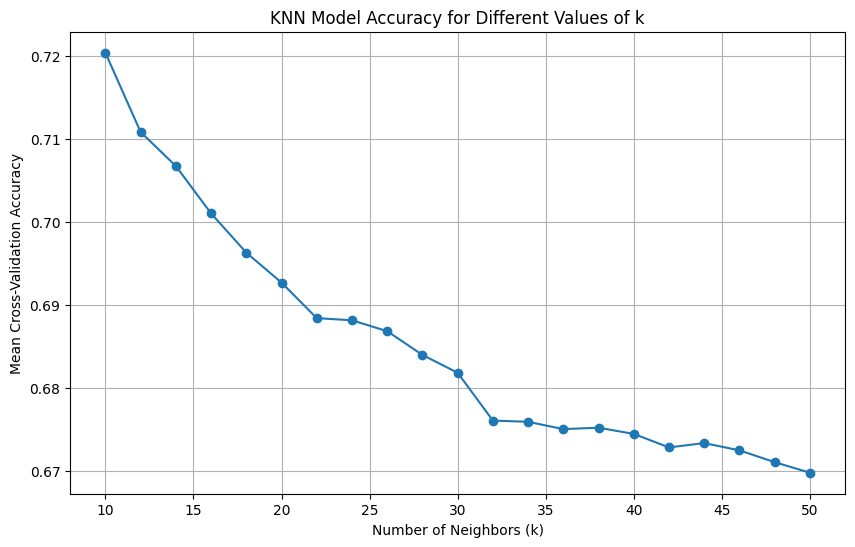

Best number of neighbors: 10
Best cross-validation accuracy: 0.720339477966759


In [ ]:
# Separate the majority and minority classes
df_majority = df_cleaned[df_cleaned['is_successful'] == 0]
df_minority = df_cleaned[df_cleaned['is_successful'] == 1]

# Oversample the minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,               # sample with replacement
                                   n_samples=len(df_majority), # to match majority class
                                   random_state=42)            # reproducible results

# Combine the majority class with the oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Check the class distribution in the oversampled data
oversampled_class_distribution = df_oversampled['is_successful'].value_counts()
print(oversampled_class_distribution)

# Extract the features and target from the oversampled data
X_knn = df_oversampled.drop(['status', 'is_successful'], axis=1)
y_knn = df_oversampled['is_successful']

# Split the oversampled data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=123123, stratify=y_knn)

# Define a pipeline for the KNN classifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features to have mean=0 and variance=1
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define a range of k values to test with the KNN classifier
param_grid = {
    'knn__n_neighbors': list(range(10, 51, 2))  # Testing odd values of k from 1 to 49
}

# Use Stratified K-Folds cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to perform cross-validation for each k value in the specified range
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_knn, y_train_knn)

# Extract the best k value and its corresponding accuracy score from the grid search results
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

# Extract the mean cross-validation scores for each k value from the grid search results
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], mean_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('KNN Model Accuracy for Different Values of k')
plt.grid(True)
plt.show()

print("Best number of neighbors:", best_k)
print("Best cross-validation accuracy:", best_score)


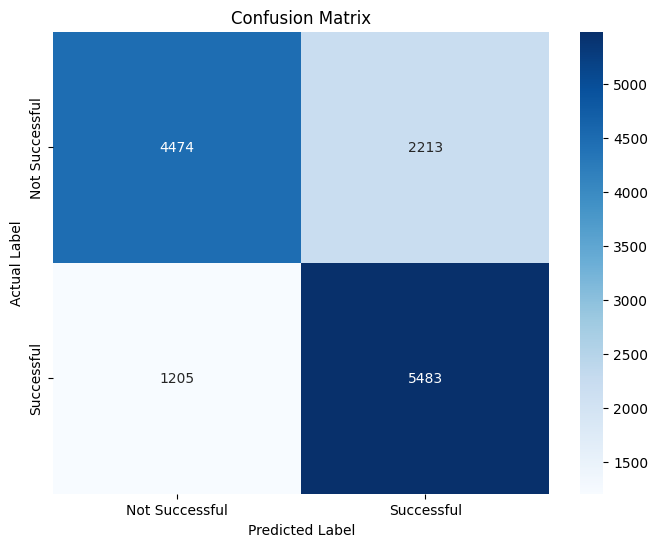

In [ ]:
knn_pipeline.set_params(knn__n_neighbors=best_k)
knn_pipeline.fit(X_train_knn, y_train_knn)

# Predict on the test set
y_pred_knn = knn_pipeline.predict(X_test_knn)

# Generate the confusion matrix for the best k
conf_matrix_best_k = confusion_matrix(y_test_knn, y_pred_knn)

conf_matrix_best_k, best_k, best_score

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_k, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

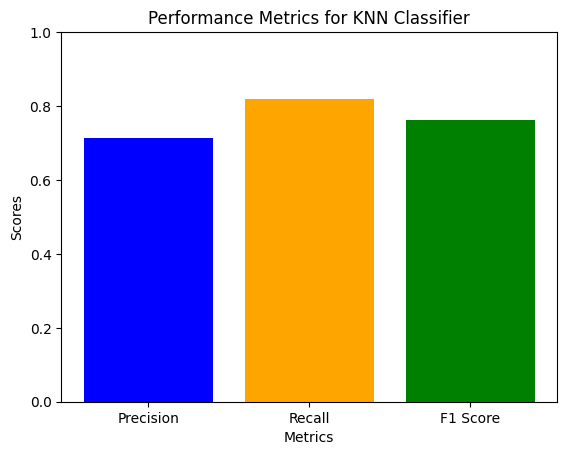

(0.712448024948025, 0.8198265550239234, 0.7623748609566185)

In [ ]:
# Metrics calculation
precision = precision_score(y_test_knn, y_pred_knn)
recall = recall_score(y_test_knn, y_pred_knn, pos_label=1)
f1 = f1_score(y_test_knn, y_pred_knn, pos_label=1)

# Metrics for plotting
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Plotting
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics for KNN Classifier')
plt.ylim([0, 1])  # Assuming scores are between 0 and 1
plt.show()

precision, recall, f1

# **Deep Learning**

In [ ]:
# Separate the majority and minority classes
df_majority = df_cleaned[df_cleaned['is_successful'] == 0]
df_minority = df_cleaned[df_cleaned['is_successful'] == 1]

# Oversample the minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,               # sample with replacement
                                   n_samples=len(df_majority), # to match majority class
                                   random_state=42)            # reproducible results

# Combine the majority class with the oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Check the class distribution in the oversampled data
oversampled_class_distribution = df_oversampled['is_successful'].value_counts()
print(oversampled_class_distribution)

# Extract the features and target from the oversampled data
X_nn = df_oversampled.drop(['status', 'is_successful'], axis=1)
y_nn = df_oversampled['is_successful']

X_train_nn, X_test_nn, y_train_nn, y_test_nnn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=123123, stratify=y_nn)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Building the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Summary of the model
model.summary()

# Training the model
history = model.fit(X_train_scaled, y_train_nn, epochs=200, batch_size=32, validation_split=0.2, verbose=1)


In [ ]:
# Print out the final metrics
print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Final Training Loss: {history.history['loss'][-1]}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]}")

# Plot training & validation accuracy values
plt.figure(figsize=(14, 7))

# Plot training accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Print out the final metrics
print(f"Final Training Precision: {history.history['precision'][-1]}")
print(f"Final Validation Precision: {history.history['val_precision'][-1]}")
print(f"Final Training Recall: {history.history['recall'][-1]}")
print(f"Final Validation Recall: {history.history['val_recall'][-1]}")

# Plot training & validation accuracy values
plt.figure(figsize=(14, 7))

# Since the keys are standard, we can use them directly
precision_key = 'precision'
val_precision_key = 'val_precision'
recall_key = 'recall'
val_recall_key = 'val_recall'

# Plot training & validation precision values
plt.subplot(1, 2, 1)
plt.plot(history.history[precision_key])
plt.plot(history.history[val_precision_key])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation recall values
plt.subplot(1, 2, 2)
plt.plot(history.history[recall_key])
plt.plot(history.history[val_recall_key])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

# **Logistic Regression**

## **Stratified sampling**
This ensures that both sets have the same proportion of each class, and the test set remains a realistic representation of the original data, as we have noticed that there is a class imbalance.

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and test sets using stratified sampling
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3, stratify=y, random_state=20)

# Further splitting the train data into training data, and validation set.
X_train_LR2, X_train_LR_val, y_train_LR2, y_train_LR_val = train_test_split(X_train_LR, y_train_LR, test_size=0.2, stratify=y_train_LR, random_state=20)


# Calculating class proportions in the original data, training set, and test set
original_proportions = y.value_counts(normalize=True)
train_proportions = y_train_LR.value_counts(normalize=True)
val_proportions = y_train_LR_val.value_counts(normalize=True)
test_proportions = y_test_LR.value_counts(normalize=True)

print("Original proportions:\n{}\n\nTrain Proportions:\n{}\n\nValidation Proportions:\n{}\n\nTest Proportions:\n{}".format(original_proportions,train_proportions,val_proportions,test_proportions))

## **Resampling:**
In this section we will apply both undersampling and oversampling to the training dataset to balance the classes. We will then train the model on these two datasets.

In [ ]:
# Getting the necessary imports
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### **Undersampling:**
We will reduce the number of instances from the majority class in the training set.
We will use a custom_cv so that we can apply undersampling to each individual fold in the cross validation later.

In [ ]:
rus = RandomUnderSampler(random_state=20)
X_train_downsampled, y_train_downsampled = rus.fit_resample(X_train_LR2, y_train_LR2)

### **Oversampling:**
We will increase the number of instances in the minority class in the training set. Here we will use imblearn's SMOTE to perform the oversampling.

In [ ]:
smote = SMOTE(random_state=20)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train_LR2, y_train_LR2)

## **Feature selection**
Here we will perform regularization to determine whether there are any features that can be removed/combined.

### **Feature selection using L1 Regularization (Lasso)**
Lasso can help in feature selection by shrinking some coefficients to zero. By using cross-validation with a range of regularization strengths, we can identify which features remain non-zero across different regularization strengths.

To ensure scaling is done within each fold of cross-validation to prevent data leakage, we'll set up a pipeline that includes scaling using StandardScaler and then logistic regression with L1 penalty.

In [ ]:
# Create a pipeline with scaling and logistic regression with L1 penalty (Lasso regularization)
# Using a pipeline ensures that scaling is done within each fold to ensure no data leakage.
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegressionCV(penalty='l1', solver='saga', max_iter=10000, cv=5, random_state=20)) # Here we use saga as the optimizer due to its versatility in handling large or small datasets.
])
# Fit the pipeline on the undersampled data
pipe_lasso.fit(X_train_downsampled, y_train_downsampled)
coef_lasso_downsampled = pipe_lasso.named_steps['clf'].coef_
score_lasso_downsampled = pipe_lasso.score(X_train_downsampled, y_train_downsampled)

# Calculate the metrics for undersampled data
y_pred_downsampled_l1 = pipe_lasso.predict(X_train_LR_val)
precision_lasso_downsampled = precision_score(y_train_LR_val, y_pred_downsampled_l1)
recall_lasso_downsampled = recall_score(y_train_LR_val, y_pred_downsampled_l1)
f1_lasso_downsampled = f1_score(y_train_LR_val, y_pred_downsampled_l1)

# Fit the pipeline on the over-sampled data
pipe_lasso.fit(X_train_upsampled, y_train_upsampled)
coef_lasso_upsampled = pipe_lasso.named_steps['clf'].coef_
score_lasso_upsampled = pipe_lasso.score(X_train_upsampled, y_train_upsampled)

# Calculate the metrics for oversampled data
y_pred_upsampled_l1 = pipe_lasso.predict(X_train_LR_val)
precision_lasso_upsampled = precision_score(y_train_LR_val, y_pred_upsampled_l1)
recall_lasso_upsampled = recall_score(y_train_LR_val, y_pred_upsampled_l1)
f1_lasso_upsampled = f1_score(y_train_LR_val, y_pred_upsampled_l1)

### **Feature selection using L2 regularization (Ridge)**
While L1 regularization (Lasso) can help in feature selection by shrinking some coefficients to zero, L2 regularization (Ridge) will shrink coefficients toward zero without necessarily setting any to exactly zero

In [ ]:
# Create a pipeline with scaling and logistic regression with L2 penalty (Ridge regularization)
# Using a pipeline ensures that scaling is done within each fold to ensure no data leakage.
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegressionCV(penalty='l2', solver='saga', max_iter=10000, cv=5, random_state=20)) # Here we use saga as the optimizer due to its versatility in handling large or small datasets.
])

# Fit the pipeline on the under-sampled data
pipe_ridge.fit(X_train_downsampled, y_train_downsampled)
coef_ridge_downsampled = pipe_ridge.named_steps['clf'].coef_
score_ridge_downsampled = pipe_ridge.score(X_train_downsampled, y_train_downsampled)

# Calculate the metrics for undersampled data
# We will validate the results against the validation set
y_pred_downsampled_l2 = pipe_ridge.predict(X_train_LR_val)
precision_ridge_downsampled = precision_score(y_train_LR_val, y_pred_downsampled_l2)
recall_ridge_downsampled = recall_score(y_train_LR_val, y_pred_downsampled_l2)
f1_ridge_downsampled = f1_score(y_train_LR_val, y_pred_downsampled_l2)

# Fit the pipeline on the over-sampled data

pipe_ridge.fit(X_train_upsampled, y_train_upsampled)
coef_ridge_upsampled = pipe_ridge.named_steps['clf'].coef_
score_ridge_upsampled = pipe_ridge.score(X_train_upsampled, y_train_upsampled)

# Calculate the metrics for oversampled data
# We will validate the results against the validation set
y_pred_upsampled_l2 = pipe_ridge.predict(X_train_LR_val)
precision_ridge_upsampled = precision_score(y_train_LR_val, y_pred_upsampled_l2)
recall_ridge_upsampled = recall_score(y_train_LR_val, y_pred_upsampled_l2)
f1_ridge_upsampled = f1_score(y_train_LR_val, y_pred_upsampled_l2)

### We will also store all the confusion matrices next

In [ ]:
from sklearn.metrics import confusion_matrix
# For L1 Regularization (Lasso) - Downsampled
conf_matrix_lasso_downsampled = confusion_matrix(y_train_LR_val, y_pred_downsampled_l1)

# For L1 Regularization (Lasso) - Upsampled
conf_matrix_lasso_upsampled = confusion_matrix(y_train_LR_val, y_pred_upsampled_l1)

# For L2 Regularization (Ridge) - Downsampled
conf_matrix_ridge_downsampled = confusion_matrix(y_train_LR_val, y_pred_downsampled_l2)

# For L2 Regularization (Ridge) - Upsampled
conf_matrix_ridge_upsampled = confusion_matrix(y_train_LR_val, y_pred_upsampled_l2)

## **Visualizing the results to compare**
Here we will visualize the results.

### **Plotting the coefficients**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame for easy plotting
coefs = pd.DataFrame({
    'Feature': X_train_downsampled.columns,
    'Lasso Downsampled': coef_lasso_downsampled.flatten(),  # Flatten in case the array is 2D
    'Lasso Upsampled': coef_lasso_upsampled.flatten(),
    'Ridge Downsampled': coef_ridge_downsampled.flatten(),
    'Ridge Upsampled': coef_ridge_upsampled.flatten()
})

# Melting the DataFrame
coefs_melted = coefs.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coefs_melted)
plt.title('Comparison of Feature Coefficients')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Model', loc='upper right')
plt.tight_layout()
plt.show()

As we can see from the chart above, the coefficient values are similar, with the only exception where they deviate being for the feature "funding_rounds".

Since startups are influenced by a wide variety of factors and each feature might contribute valuable information, L1 regularization not reducing any coefficients to zero suggests that all features have some predictive power. In the context of startups, where unexpected factors can be significant, retaining more features could be beneficial.

We will thus retain all the features as they are.

### **Plotting the metrics**

In [ ]:
# Storing all the calculated metrics into a metrics dictionary so that we can plot them
metrics_dict = {
    'Lasso Downsampled': {
        'Accuracy': score_lasso_downsampled,
        'Precision': precision_lasso_downsampled,
        'Recall': recall_lasso_downsampled,
        'F1': f1_lasso_downsampled
    },
    'Lasso Upsampled': {
        'Accuracy': score_lasso_upsampled,
        'Precision': precision_lasso_upsampled,
        'Recall': recall_lasso_upsampled,
        'F1': f1_lasso_upsampled
    },
    'Ridge Downsampled': {
        'Accuracy': score_ridge_downsampled,
        'Precision': precision_ridge_downsampled,
        'Recall': recall_ridge_downsampled,
        'F1': f1_ridge_downsampled
    },
    'Ridge Upsampled': {
        'Accuracy': score_ridge_upsampled,
        'Precision': precision_ridge_upsampled,
        'Recall': recall_ridge_upsampled,
        'F1': f1_ridge_upsampled
    }
}

# Convert metrics_dict to a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics_dict).T.reset_index()
metrics_df.rename(columns={'index': 'Sampling/Regularization'}, inplace=True)

# Melt the DataFrame to make it suitable for sns.barplot
metrics_melted = metrics_df.melt(id_vars='Sampling/Regularization', var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Sampling/Regularization', data=metrics_melted)
plt.title('Performance Metrics for L1 and L2 Regularized Logistic Regression')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Sampling/Regularization')
plt.tight_layout()
plt.show()


As we can see from the barchart above, the undersampled dataset (decreasing representation of the the majority) produces a better recall value than the oversampled dataset. We will prioritise the recall value, as it shows the model's ability to find the minority class.

Therefore, from here onwards, we will use the undersampled dataset, together with the lasso regression.


### **Plotting the confusion matrices**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['Lasso Downsampled', 'Lasso Upsampled', 'Ridge Downsampled', 'Ridge Upsampled']

# Confusion matrices to be plotted
conf_matrices = [conf_matrix_lasso_downsampled, conf_matrix_lasso_upsampled,
                 conf_matrix_ridge_downsampled, conf_matrix_ridge_upsampled]

for ax, matrix, title in zip(axes.flatten(), conf_matrices, titles):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

As we can see, there is no difference at all between the lasso and ridge regularizations between the undersampled and oversampled data respectively.

However, we can see that between undersampling and oversampling, the model was better able to correctly predict the minority class, with the undersampled dataset, which in our dataset refers to the startups that are successful.

This further proves that, at least during the training, we should use the lasso regression with undersampling.

## **Adjusting the threshold**

Over here we will select the threshold that optimises the difference between the True Positive Rate and the False Positive Rate. This is because we want to maximise the ability of the model to correctly classify the most positives out of actual positives.

Theoretically, we can get the model to identify all the positive cases by merely lowering the threshold, but that would also mean that there would be more false positives as well.

This is why we balance that by having the optimal threshold being at the point where the TPR-FPR is the highest.

In [ ]:
from sklearn.metrics import roc_curve, auc

# We will fit the model we want to adjust the threshold of
pipe_lasso.fit(X_train_downsampled, y_train_downsampled)

# Get probabilities for the positive class
y_pred_probs_downsampled_l1 = pipe_lasso.predict_proba(X_train_LR_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_train_LR_val, y_pred_probs_downsampled_l1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)


From the calculations done above, we can see that the optimal threshold for our specifications is 0.504

## **Model evaluation on test set**
Now we will finally test the models ability against the test using the following parameters.

* Undersampled
* L1 Regularization (Lasso)
* Threshold: 0.504



In [ ]:
# optimal threshold calculated from previous step; 0.47

# Combine the training set with the validation set and undersample them
X_train_final, y_train_final = rus.fit_resample(pd.concat([X_train_LR2,X_train_LR_val]), pd.concat([y_train_LR2,y_train_LR_val]))

# Train the final model using the pipe to ensure that the scaling is done before the regression
# We will use the undersampled data from the previous line to train the model
pipe_lasso.fit(X_train_final, y_train_final)

# Predict probabilities on the test set
y_test_probs = pipe_lasso.predict_proba(X_test_LR)[:, 1]  # Probabilities of the positive class

# Apply the threshold to these probabilities to get the final predictions
y_test_pred_custom_threshold = (y_test_probs >= optimal_threshold).astype(int)

# Calculate the metrics using the new predictions
test_accuracy = accuracy_score(y_test_LR, y_test_pred_custom_threshold)
test_precision = precision_score(y_test_LR, y_test_pred_custom_threshold)
test_recall = recall_score(y_test_LR, y_test_pred_custom_threshold)
test_f1 = f1_score(y_test_LR, y_test_pred_custom_threshold)

print("Accuracy:{} Precision: {} Recall: {} f1: {}".format(test_accuracy,test_precision,test_recall,test_f1))
# Confusion matrix with the new threshold
test_conf_matrix = confusion_matrix(y_test_LR, y_test_pred_custom_threshold)

# Visualization of the metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Metrics barplot
metrics = [test_accuracy, test_precision, test_recall, test_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sns.barplot(x=metric_names, y=metrics, ax=ax[0])
ax[0].set_title('Test Metrics')
ax[0].set_ylim(0, 1)  # Setting the limit for y-axis to show percentages

# Confusion Matrix heatmap
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

We can see that the Sensitivity/Recall of the model's ability on the test set is 767/(767+628), which is 0.5498. This is not a very good result, because it can only accurately predict about 54% of the positive results. (It can only predict that a startup is a success about 54% of the time out of actual successes) This is barely any better than a random guess.

This was expected, due to the severe class imbalance in the dataset. However, this is not too bad, as the specificity of the model is 7425/(7425/2606), which is 0.7402. This means the model was able to predict about 74% of the actual negatives as negative.

However, the model is not entirely useless. With some other hyperparameter tunings, we can potentially increase the specificity or perhaps even the sensitivity. In the context of a venture capital wanting to predict the success rate of a model, accurately predicting the failure of a startup prevents loss, as opposed to accurately predicting the success of startup, which if wrongly predicted merely translates to a loss in <u>**potential**</u> profits.

# **Support Vector Machine (SVM)**



In [ ]:
#Importing the libraries to perform SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Split the data into training and testing sets
X_svm = X.copy()
y_svm = y.copy()

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=1234)

X_train_svm.shape, X_test_svm.shape, y_train_svm.shape, y_test_svm.shape

In [ ]:
# We need to scale the data because Support Vector Machine methods are sensibel to the distance of the data
# We will scale also the categorical variables
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_svm_scaled = X_train_svm.copy()
X_test_svm_scaled = X_test_svm.copy()

numerical = X_train_svm_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_svm_scaled[numerical] = scaler.fit_transform(X_train_svm_scaled[numerical])
X_test_svm_scaled[numerical] = scaler.transform(X_test_svm_scaled[numerical])

X_train_svm_scaled.head()

### Simple SVM Model with liner Kernel

Lets fit a basic support vector machine model to analyse the preliminary results

In [ ]:
# Initialize and train a simple SVM classifier
svc = SVC(kernel='linear', C=1)
svc.fit(X_train_svm_scaled, y_train_svm)

In [ ]:
# Make predictions and evaluate the simple model
y_pred_1 = svc.predict(X_test_svm_scaled)
accuracy_1= accuracy_score(y_test_svm, y_pred_1)
recall_1 = recall_score(y_test_svm, y_pred_1)
precision_1 = precision_score(y_test_svm, y_pred_1)
f1_1 = f1_score(y_test_svm, y_pred_1)
print(f"Initial model accuracy: {accuracy_1}")
print(f"Initial model recall: {recall_1}")
print(f"Initial model precision: {precision_1}")
print(f"Initial model f1 score: {f1_1}")

In [ ]:
#defining the confusion matrix function since we will need to use it many times throughout the code

def plot_confusion_matrix(Actual_y, Predicted_y):
      confusion_matrix_1 = confusion_matrix(Actual_y, Predicted_y)

      # Create a DataFrame for the confusion matrix
      cm_df = pd.DataFrame(confusion_matrix_1, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

      # Plot the confusion matrix using seaborn
      plt.figure(figsize=(8, 6))
      sns.set(font_scale=1.4)  # Adjust the font scale for better readability
      sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})

      # Add labels and a title
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.title('Confusion Matrix')

      plt.show()

In [ ]:
#plot the confusion matrix of the first SVM model
plot_confusion_matrix(y_test_svm, y_pred_1)

The dataset is highly unbalanced, hence the accuracy score is not a good indicator of goodness of the model, for this reason, we should use the recall score.

**The recall is equal to 0.0 meaning that the model has been completely unsuccessful at predicting if a startup is going to succede. The successful observations are so limited compared to the successful ones that the model has overfitted the majority class (unsuccessful) neglecting the successful observations**

To adress this issue we must utilise the Undersampling or Oversampling, lets start with undersampling.

## Training SVM on undersampled dataset ##

In [ ]:
xy = df_cleaned.copy()
xy.head

We will keep the Test set as it is with 20% of the observations so after fitting the model on a downsampled test set we will be able to evaluate it on an unbalanced test set that actually resembles the original dataset

In [ ]:
xy_train_svm, xy_test_svm = train_test_split(xy, test_size=0.2, random_state=1234)

xy_train_svm.shape, xy_test_svm.shape

Lets now create the downsampled training dataset:

In [ ]:
# Separate the majority and minority classes
majority_class = xy_train_svm[xy_train_svm['status'] == 'operating']
closed_class = xy_train_svm[xy_train_svm['status'] == 'closed']
minority_class = xy_train_svm[(xy_train_svm['status'] == 'ipo') | (xy_train_svm['status'] == 'acquired')]

# Downsample the majority class to match the number of samples in the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=(len(minority_class)-len(closed_class)), random_state=1234)

# Combine the minority class with the downsampled majority class to create a balanced dataset
balanced_data = pd.concat([majority_downsampled, minority_class, closed_class])

# Check what has been done
print("Initial dataset observations: ", len(xy_train_svm))
print("Initial Operating observations: ", len(majority_class))
print("Closed observations: ", len(closed_class))
print("Ipo and Acquired obeservations: ", len(minority_class))
print("Downsampled Operating observations: ", len(majority_downsampled))
print("Final dataset observations: ", len(balanced_data))

In [ ]:
# Drop the datetime variables that the SVM model does not support those data types. The information regarding the date will still be incluede in the model since we have done
# feature engineering

balanced_data.reset_index(drop=True, inplace=True)  # Reset the indices
X_train_svm_b = balanced_data.drop(['status','is_successful'], axis=1)
y_train_svm_b = balanced_data['is_successful']

#Preparing the unbalanced testing dataset
X_test_svm_unb = xy_test_svm.drop(['status','is_successful'], axis=1)
y_test_svm_unb = xy_test_svm['is_successful']

X_train_svm_b.head(), y_train_svm_b.head()

To see if the results have improved by using the downsampled data we will fit a simble SVM model (same as before) and compare the results

In [ ]:
# We need to scale the data because Support Vector Machine methods are sensibel to the distance of the data
# We will scale also the categorical variables
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_svm_b_scaled = X_train_svm_b.copy()
X_test_svm_unb_scaled = X_test_svm_unb.copy()

numerical = X_train_svm_b_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_svm_b_scaled[numerical] = scaler.fit_transform(X_train_svm_b_scaled[numerical])
X_test_svm_unb_scaled[numerical] = scaler.transform(X_test_svm_unb_scaled[numerical])

In [ ]:
# Initialize and train a simple SVM classifier -same as before (model 1)- the exact same that has been trained before, we want to compare the results to see if something has improved by downsampling
svc_2 = SVC(kernel='linear', C=1)
svc_2.fit(X_train_svm_b_scaled, y_train_svm_b)

In [ ]:
# Make predictions and evaluate the model
y_pred_2 = svc_2.predict(X_test_svm_unb_scaled)
accuracy_2= accuracy_score(y_test_svm_unb, y_pred_2)
recall_2 = recall_score(y_test_svm_unb, y_pred_2)
print(f"Model accuracy: {accuracy_2}")
print(f"Model recall: {recall_2}")

In [ ]:
plot_confusion_matrix(y_test_svm_unb, y_pred_2)

We can observe that by using a undersampled dataset to train the model the results have become better since the model is able to learn better the pattern of the minority class (successful startups). However, even though there has been an improvement, the model is still not performing very well. We must proceed with tuning the hyperparameters to improve the model's performance

### SVM linear kernel:
Let's test a wide range of C values first and then reiterate the process on the best ones

In [ ]:
C_values = [0.1, 1, 10, 100, 1000]  # List of C values to search
n_folds = 5     # Number of folds for cross-validation

# Initialize KFold with shuffle=True to randomize the data
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1234)

# Initialize lists to store cross-validation results
recall_values_svm_lin = []
accuracy_values_svm_lin = []

# Initialize variables to store the best recall score
best_C_svm_lin = None
best_recall_svm_lin = 0.0
best_model_svm_lin = None

# Perform cross-validation
for C in C_values:
    fold_recall_values = []
    fold_accuracy_values = []
    for train_index, test_index in kf.split(X_train_svm_b):
        X_trainCV, X_testCV = X_train_svm_b.iloc[train_index],X_train_svm_b.iloc[test_index]
        y_trainCV, y_testCV = y_train_svm_b.iloc[train_index], y_train_svm_b.iloc[test_index]

        # Standardize the data using the training data's mean and standard deviation
        scaler = StandardScaler()
        X_trainCV_scaled = scaler.fit_transform(X_trainCV)
        X_testCV_scaled = scaler.transform(X_testCV)

        svm_lin = SVC(kernel='linear', C=C)
        svm_lin.fit(X_trainCV_scaled, y_trainCV)

        # Make predictions on the standardized testing data
        y_pred_svm_lin = svm_lin.predict(X_testCV_scaled)

        # Calculate the recall and accuracy for the current fold
        fold_recall_values.append(recall_score(y_testCV, y_pred_svm_lin))
        fold_accuracy_values.append(accuracy_score(y_testCV, y_pred_svm_lin))

    # Calculate the mean recall across all folds for the current C
    mean_recall_svm_lin = np.mean(fold_recall_values)
    recall_values_svm_lin.append(mean_recall_svm_lin)

    # Calculate the mean recall across all folds for the current C
    mean_accuracy_svm_lin = np.mean(fold_accuracy_values)
    accuracy_values_svm_lin.append(mean_accuracy_svm_lin)

    # Check if the current C has a higher recall than the best C found so far
    if mean_recall_svm_lin > best_recall_svm_lin:
        best_C_svm_lin = C
        best_recall_svm_lin = mean_recall_svm_lin
        best_model_svm_lin = svm_lin

print("Best C:", best_C_svm_lin)
print("Best Recall:", best_recall_svm_lin)
print("Best Model:", best_model_svm_lin)
print("Checking Recall scores for differst C: ", recall_values_svm_lin)
print("Checking Accuracy scores for differst C: ", accuracy_values_svm_lin)


In [ ]:
plt.plot(C_values, recall_values_svm_lin, marker='o', label='Mean Recall')
plt.plot(C_values, accuracy_values_svm_lin, marker='x', label='Accuracy')

plt.xlabel('C Values')
plt.ylabel('Scores')
plt.title('C Values vs. Mean Recall/Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Performing a sporadic test with C = 2000 to see if there are improvements going further with higher C values, sice the best C found in the previous iteration was the C with the highest value

In [ ]:
C_values = [2000]  # List of C values to search
n_folds = 5     # Number of folds for cross-validation

# Initialize KFold with shuffle=True to randomize the data
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1234)

# Initialize lists to store cross-validation results
recall_values_svm_lin = []
accuracy_values_svm_lin = []

# Initialize variables to store the best recall score
best_C_svm_lin = None
best_recall_svm_lin = 0.0
best_model_svm_lin = None

# Perform cross-validation
for C in C_values:
    fold_recall_values = []
    fold_accuracy_values = []
    for train_index, test_index in kf.split(X_train_svm_b):
        X_trainCV, X_testCV = X_train_svm_b.iloc[train_index],X_train_svm_b.iloc[test_index]
        y_trainCV, y_testCV = y_train_svm_b.iloc[train_index], y_train_svm_b.iloc[test_index]

        # Standardize the data using the training data's mean and standard deviation
        scaler = StandardScaler()
        X_trainCV_scaled = scaler.fit_transform(X_trainCV)
        X_testCV_scaled = scaler.transform(X_testCV)

        svm_lin = SVC(kernel='linear', C=C)
        svm_lin.fit(X_trainCV_scaled, y_trainCV)

        # Make predictions on the standardized testing data
        y_pred_svm_lin = svm_lin.predict(X_testCV_scaled)

        # Calculate the recall and accuracy for the current fold
        fold_recall_values.append(recall_score(y_testCV, y_pred_svm_lin))
        fold_accuracy_values.append(accuracy_score(y_testCV, y_pred_svm_lin))

    # Calculate the mean recall across all folds for the current C
    mean_recall_svm_lin = np.mean(fold_recall_values)
    recall_values_svm_lin.append(mean_recall_svm_lin)

    # Calculate the mean recall across all folds for the current C
    mean_accuracy_svm_lin = np.mean(fold_accuracy_values)
    accuracy_values_svm_lin.append(mean_accuracy_svm_lin)

    # Check if the current C has a higher recall than the best C found so far
    if mean_recall_svm_lin > best_recall_svm_lin:
        best_C_svm_lin = C
        best_recall_svm_lin = mean_recall_svm_lin
        best_model_svm_lin = svm_lin

print("Best C:", best_C_svm_lin)
print("Best Recall:", best_recall_svm_lin)
print("Best Model:", best_model_svm_lin)
print("Checking Recall values for differst C: ", recall_values_svm_lin)
print("Checking Accuracy values for differst C: ", accuracy_values_svm_lin)

There seems to be almost no improvement, so we won't test any other C value.

The best C (out of the tested ones) for the linear Kernel is 1000. We could test other C values but overall it seems that it doesn't really make a difference so for now lets consider 1000. The Recall score is still low suggesting that the linear kernel may not be the best alternative to use. Anyways lets fit the a model considering all the data.

In [ ]:
# Fit the final Support Vector Machine model with the optimal C on the standardized dataset
final_svm_lin = SVC(kernel='linear', C=1000)
final_svm_lin.fit(X_train_svm_b_scaled, y_train_svm_b)

# Make predictions on the standardized testing data
final_svm_lin_pred = final_svm_lin.predict(X_test_svm_unb_scaled)

# Calculating the recall score and accuracy of the model
final_recall = recall_score(y_test_svm_unb, final_svm_lin_pred)
final_accuracy = accuracy_score(y_test_svm_unb, final_svm_lin_pred)
final_precision = precision_score(y_test_svm_unb, final_svm_lin_pred)
final_f1 = f1_score(y_test_svm_unb, final_svm_lin_pred)

print("Recall Score with linear kernel and C=1000:", final_recall)
print("Accuracy Score with linear kernel and C=1000:", final_recall)
print("Precision Score with linear kernel and C=1000:", final_precision)
print("F1 Score with linear kernel and C=1000:", final_f1)

In [ ]:
# Calculating and ploting the confusion matrix
plot_confusion_matrix(y_test_svm_unb, final_svm_lin_pred)

The model is still performing bad. I assume that the linear kernel is not ideal for this dataset, lets try the other options starting with the polynomial one

### SVM with Polynomial Kernel

In [ ]:
#Defining a Cross Validation function to test with cross validation various values of d and C for the polynomial kernel
def cross_validate_svm_poly(X_train, y_train, C_test, degree_test, n_folds=5):

    # Initialize KFold with shuffle=True to randomize the data
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=1234)

    # Initialize list to store cross-validation results
    results_svm_poly = []

    # Initialize variables to store the best hyperparameters and model
    best_degree = None
    best_C_poly = None
    best_recall_svm_poly = 0.0
    best_accuracy_svm_poly = 0.0
    best_model_svm_poly = None

    # Perform cross-validation
    for degree in degree_values:
        for C in C_values:
            fold_recall_values = []
            fold_accuracy_values = []
            for train_index, test_index in kf.split(X_train_svm_b):
                X_trainCV, X_testCV = X_train.iloc[train_index], X_train.iloc[test_index]
                y_trainCV, y_testCV = y_train.iloc[train_index], y_train.iloc[test_index]

                # Standardize the data using the training data's mean and standard deviation
                scaler = StandardScaler()
                X_trainCV_scaled = scaler.fit_transform(X_trainCV)
                X_testCV_scaled = scaler.transform(X_testCV)

                svm_poly = SVC(kernel='poly', degree=degree, C=C)
                svm_poly.fit(X_trainCV_scaled, y_trainCV)

                # Make predictions on the standardized testing data
                y_pred_svm_poly = svm_poly.predict(X_testCV_scaled)

                # Calculate the recall and accuracy for the current fold
                fold_recall_values.append(recall_score(y_testCV, y_pred_svm_poly))
                fold_accuracy_values.append(accuracy_score(y_testCV, y_pred_svm_poly))

            # Calculate the mean recall and accuracy across all folds for the current hyperparameters
            mean_recall_svm_poly = np.mean(fold_recall_values)
            mean_accuracy_svm_poly = np.mean(fold_accuracy_values)
            results_svm_poly.append((C, degree, mean_accuracy_svm_poly, mean_recall_svm_poly))

            # Check if the current hyperparameters have a higher recall than the best found so far
            if mean_accuracy_svm_poly > best_accuracy_svm_poly:
                best_C_poly = C
                best_degree = degree
                best_accuracy_svm_poly = mean_accuracy_svm_poly
                best_model_svm_poly = svm_poly

    return  results_svm_poly, best_model_svm_poly, best_degree

In [ ]:
C_values = [0.1, 1, 10, 100]
degree_values = [2, 3, 4]
results = []
results, best_model, b_degree = cross_validate_svm_poly(X_train_svm_b, y_train_svm_b, C_values, degree_values)
for C, degree, accuracy, recall in results:
    print(f"C: {C}, degree: {degree}, accuracy: {accuracy}, recall: {recall}")
print("Best Model:", best_model, b_degree)

This time we can notice a substancial improvement compared to the previous models. The best option for the polynomial Kernel is the one with degree=3 and C=100. But we must try other options for the degree (4, 5, ...) and especially for the C since we can observe that the C improves for degree = 3 from the smallest C to the highest one, hence we should test Cs that are higher than 100


In [ ]:
#testing with other degree values
C_values = [ 1, 10, 100]
degree_values = [4,5]
results = []
results, best_model, b_degree = cross_validate_svm_poly(X_train_svm_b, y_train_svm_b, C_values, degree_values)
for C, degree, accuracy, recall in results:
    print(f"C: {C}, degree: {degree}, accuracy: {accuracy}, recall: {recall}")
print("Best Model:", best_model, b_degree)

Other degrees don't seem to be better that degree = 3. We should now test other C values for degree = 3

In [ ]:
C_values = [500, 1000, 1500]
degree_values = [3]
results = []
results, best_model, b_degree = cross_validate_svm_poly(X_train_svm_b, y_train_svm_b, C_values, degree_values)
for C, degree, accuracy, recall in results:
    print(f"C: {C}, degree: {degree}, accuracy: {accuracy}, recall: {recall}")
print("Best Model:", best_model, b_degree)

C=100 and degree=3 appears to be model that gives the best results (out of the tested ones). Lets now try to fit models with degree=3 and C that is close to 100

In [ ]:
C_values = [70, 85, 95, 100, 95, 115, 130]
degree_values = [3]
results = []
results, best_model, b_degree = cross_validate_svm_poly(X_train_svm_b, y_train_svm_b, C_values, degree_values)
for C, degree, accuracy, recall in results:
    print(f"C: {C}, degree: {degree}, accuracy: {accuracy}, recall: {recall}")
print("Best Model:", best_model, b_degree)

The best SVM model with polinomia appears to be the one with degree=3 and C=95. Since most CV tests that have been executed did not change the results significantly we can consider those results to train a final model and test it with the test set.

In [ ]:
# Fit the final Support Vector Machine model with the optimal C on the standardized dataset
final_svm_poly = SVC(kernel='poly', degree=3, C=95)
final_svm_poly.fit(X_train_svm_b_scaled, y_train_svm_b)

# Make predictions on the standardized testing data
final_svm_poly_pred = final_svm_poly.predict(X_test_svm_unb_scaled)

# Calculating the Accuracy and Recall of the model
final_accuracy = accuracy_score(y_test_svm_unb, final_svm_poly_pred)
final_recall = recall_score(y_test_svm_unb, final_svm_poly_pred)
final_precision = precision_score(y_test_svm_unb, final_svm_poly_pred)
final_f1 = f1_score(y_test_svm_unb, final_svm_poly_pred)

print("Accuracy Score with polynomial kernel with dimension=3 and C=100:", final_accuracy)
print("Recall Score with polynomial kernel with dimension=3 and C=100:", final_recall)
print("Precision Score with polynomial kernel with dimension=3 and C=100:", final_precision)
print("F1 Score with polynomial kernel with dimension=3 and C=100:", final_f1)

In [ ]:
# Calculating and ploting the confusion matrix
plot_confusion_matrix(y_test_svm_unb, final_svm_poly_pred)

The Polynomial SVM Model is performing better that the linear one bu it's still far from being satisfying. No efficient investment decisions can be taken with these results We should now try to fit a SVM model using the Radial Kernel to see if results get better.

### SVM with Radial Kernel

In [ ]:
def cross_validate_svm_rbf(X_train, y_train, C_test, gamma_test, n_folds=5):

    # Initialize KFold with shuffle=True to randomize the data
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=1234)

    # Initialize list to store results
    results_svm_rbf = []

    # Initialize variables to store the best hyperparameters and model
    best_C_rbf = None
    best_gamma_rbf = None
    best_recall_svm_rbf = 0.0
    best_accuracy_svm_rbf = 0.0
    best_model_svm_rbf = None

    # Perform cross-validation
    for C in C_test:
        for gamma in gamma_test:
            fold_recall_values = []
            fold_accuracy_values = []
            for train_index, test_index in kf.split(X_train):
                X_trainCV, X_testCV = X_train.iloc[train_index], X_train.iloc[test_index]
                y_trainCV, y_testCV = y_train.iloc[train_index], y_train.iloc[test_index]

                # Standardize the data using the training data's mean and standard deviation
                scaler = StandardScaler()
                X_trainCV_scaled = scaler.fit_transform(X_trainCV)
                X_testCV_scaled = scaler.transform(X_testCV)

                svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
                svm_rbf.fit(X_trainCV_scaled, y_trainCV)

                # Make predictions on the standardized testing data
                y_pred_svm_rbf = svm_rbf.predict(X_testCV_scaled)

                # Calculate the recall and accuracy for the current fold
                fold_recall_values.append(recall_score(y_testCV, y_pred_svm_rbf))
                fold_accuracy_values.append(accuracy_score(y_testCV, y_pred_svm_rbf))

            # Calculate the mean recall and accuracy across all folds for the current hyperparameters
            mean_recall_svm_rbf = np.mean(fold_recall_values)
            mean_accuracy_svm_rbf = np.mean(fold_accuracy_values)
            results_svm_rbf.append((C, gamma, mean_accuracy_svm_rbf, mean_recall_svm_rbf))

            # Check if the current hyperparameters have a higher accuracy than the best found so far
            if mean_accuracy_svm_rbf > best_accuracy_svm_rbf:
                best_C_rbf = C
                best_gamma_rbf = gamma
                best_accuracy_svm_rbf = mean_accuracy_svm_rbf
                best_model_svm_rbf = svm_rbf

    return results_svm_rbf, best_model_svm_rbf

Lets start by testing some values of Gamma and C for the Radial Kernel

In [ ]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10, 100]
results = []
results, best_model = cross_validate_svm_rbf(X_train_svm_b, y_train_svm_b, C_values, gamma_values)
for C, gamma, accuracy, recall in results:
    print(f"C: {C}, gamma: {gamma}, accuracy: {accuracy}, recall: {recall}")
print("Best Model:", best_model)

The best model out of the testes ones is the one with C=10 and gamma=0.1 lets try other values of gamma and C in the surroundings of the ones that we found so far.

In [ ]:
C_values = [7, 10, 15]
gamma_values = [0.5, 0.1, 1.5]
results = []
results, best_model = cross_validate_svm_rbf(X_train_svm_b, y_train_svm_b, C_values, gamma_values)
for C, gamma, accuracy, recall in results:
    print(f"C: {C}, gamma: {gamma}, accuracy: {accuracy}, recall: {recall}")
print("Best Model:", best_model)

In [ ]:
# Fit the final Support Vector Machine model with the optimal C on the standardized dataset
final_svm_rbf = SVC(kernel='rbf', C=15, gamma=0.1)
final_svm_rbf.fit(X_train_svm_b_scaled, y_train_svm_b)

# Make predictions on the standardized testing data
final_svm_rbf_pred = final_svm_rbf.predict(X_test_svm_unb_scaled)

# Calculating the Recall and Accuracy of the model
final_recall = recall_score(y_test_svm_unb, final_svm_rbf_pred)
final_accuracy = accuracy_score(y_test_svm_unb, final_svm_rbf_pred)
final_precision = precision_score(y_test_svm_unb, final_svm_rbf_pred)
final_f1 = f1_score(y_test_svm_unb, final_svm_rbf_pred)

print("Recall Score with radial kernel tuned with C=015 and gamma=0.1:", final_recall)
print("Accuracy Score with radial kernel tuned with C=015 and gamma=0.1:", final_accuracy)
print("Precision Score with radial kernel tuned with C=015 and gamma=0.1:", final_precision)
print("Accuracy Score with radial kernel tuned with C=015 and gamma=0.1:", final_f1)

In [ ]:
# Calculating and ploting the confusion matrix
plot_confusion_matrix(y_test_svm_unb, final_svm_rbf_pred)

Even when employing the radial kernel, the model's performance remains suboptimal for informing investment decisions. The predictive accuracy is only marginally better than chance, hovering slightly above a 50% probability of making a correct investment choice. This level of accuracy is tantamount to making random investment decisions.

Lets now try to re-train the models this time with an oversampled training dataset to see if we get to better results.